In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import yaml

# Yaml file visualization

In [3]:
metadados = yaml.load(open('metadata.yaml', 'r'))
metadados

<ipython-input-3-c73b7db7ee3a>:1: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  metadados = yaml.load(open('metadata.yaml', 'r'))


{'dataset': 'adult',
 'description': 'Prediction of whether a person makes over $50K a year, based on 14 other features.',
 'source': 'http://mlr.cs.umass.edu/ml/datasets/Adult https://www.openml.org/d/1590\n',
 'publication': 'Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid",  Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996\n',
 'task': 'classification',
 'keywords': ['income', 'demographics'],
 'target': {'type': 'binary',
  'description': 'If a given adult makes over $50K a year',
  'code': "'<=50K' = 1,  '>50K' = 0\n"},
 'features': [{'name': 'age',
   'type': 'continuous',
   'description': 'age of adults'},
  {'name': 'workclass',
   'type': 'categorical',
   'description': 'working class (mostly between government or self employed)',
   'code': "'?' = 0,  'Federal-gov' = 1,  'Local-gov' = 2,  'Never-worked' = 3,  'Private' = 4,  'Self-emp-inc' = 5,  'Self-emp-not-inc' = 6,  'State-gov' = 7,  

In [4]:
metadados.keys()

dict_keys(['dataset', 'description', 'source', 'publication', 'task', 'keywords', 'target', 'features'])

In [5]:
print(metadados['dataset'])
print('---------------------------')
print(metadados['description'])
print('---------------------------')
print(metadados['source'])
print('---------------------------')
print(metadados['publication'])
print('---------------------------')
print(metadados['task'])

adult
---------------------------
Prediction of whether a person makes over $50K a year, based on 14 other features.
---------------------------
http://mlr.cs.umass.edu/ml/datasets/Adult https://www.openml.org/d/1590

---------------------------
Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid",  Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996

---------------------------
classification


In [6]:
metadados['target']

{'type': 'binary',
 'description': 'If a given adult makes over $50K a year',
 'code': "'<=50K' = 1,  '>50K' = 0\n"}

In [7]:
for var_dic in metadados['features']:
    print(f'{var_dic["name"]:20s} : {var_dic["description"]}')
    if var_dic["type"] == 'categorical':
        depara = var_dic['code']
        # split: transforms the string in a list, with a new element every time that it encounters a comma
        for val in depara.split(','):
            # strip: remove spaces at the end or at the beginning of a string
            print(f'\t{val.strip()}')
            
    print('-------------------------------------------------------------------------')

age                  : age of adults
-------------------------------------------------------------------------
workclass            : working class (mostly between government or self employed)
	'?' = 0
	'Federal-gov' = 1
	'Local-gov' = 2
	'Never-worked' = 3
	'Private' = 4
	'Self-emp-inc' = 5
	'Self-emp-not-inc' = 6
	'State-gov' = 7
	'Without-pay' = 8
-------------------------------------------------------------------------
fnlwgt               : population totals, weighted according to many parameters, including race, sex, and age (see openML page under Variable Description for more details)

-------------------------------------------------------------------------
education            : education level of adult
-------------------------------------------------------------------------
education-num        : Grade number of education level
-------------------------------------------------------------------------
marital-status       : Marital status of adult
	'Divorced' = 0
	'Married-AF

# Explaining the model

## Model:
- Government wants to **determine whether a person earns more than R$50.000/year**, based on demographic variables.
- Model must be **explanatory**.

### Eventhough the metadata does not explain the purpose of the model, we can come up with a few hipotheses about the purpose of our study:
- Which is the most financially affected population in my data set?
- How to develop and optimize policies to reduce inequality?
- How to better understand minorities?
- How to better understand our population in order to manage traffic and urban mobility better (working hours, owned cars or use of public transport and marital status or if the person has kids)?

### We want to know **which features are more significant** to the response variable.
Therefore, we'll use a Decision Tree model, so we can **measure gini/entropy of each variable**.

# Reading our data set

In [8]:
df = pd.read_csv('adult.csv')
df

age  workclass    fnlwgt  education  education-num  marital-status  \
0      39.0          7   77516.0          9           13.0               4   
1      50.0          6   83311.0          9           13.0               2   
2      38.0          4  215646.0         11            9.0               0   
3      53.0          4  234721.0          1            7.0               2   
4      28.0          4  338409.0          9           13.0               2   
...     ...        ...       ...        ...            ...             ...   
48837  39.0          4  215419.0          9           13.0               0   
48838  64.0          0  321403.0         11            9.0               6   
48839  38.0          4  374983.0          9           13.0               2   
48840  44.0          4   83891.0          9           13.0               0   
48841  35.0          5  182148.0          9           13.0               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               1             1     4    1        2174.0           0.0   
1               4             0     4    1           0.0           0.0   
2               6             1     4    1           0.0           0.0   
3               6             0     2    1           0.0           0.0   
4              10             5     2    0           0.0           0.0   
...           ...           ...   ...  ...           ...           ...   
48837          10             1     4    0           0.0           0.0   
48838           0             2     2    1           0.0           0.0   
48839          10             0     4    1           0.0           0.0   
48840           1             3     1    1        5455.0           0.0   
48841           4             0     4    1           0.0           0.0   

       hours-per-week  native-country  target  
0                40.0              39       1  
1                13.0              39       1  
2                40.0              39       1  
3                40.0              39       1  
4                40.0               5       1  
...               ...             ...     ...  
48837            36.0              39       1  
48838            40.0              39       1  
48839            50.0              39       1  
48840            40.0              39       1  
48841            60.0              39       0  

[48842 rows x 15 columns]

# Preliminary analysis

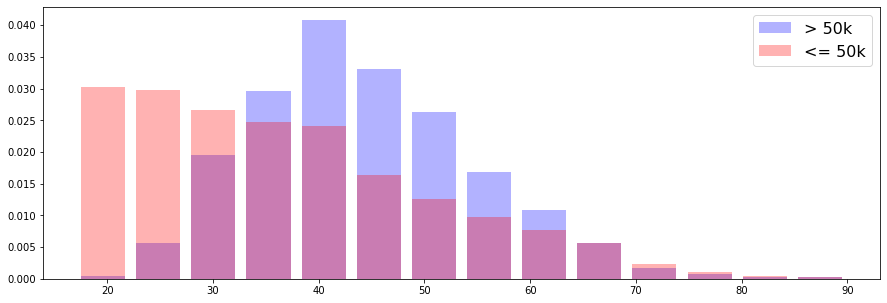

In [9]:
plt.figure(figsize=(15,5))

minimo = df.age.min()
maximo = df.age.max()
nbins=15
bins = np.linspace(minimo,maximo,nbins)

plt.hist(df.loc[df.target==0].age, bins=bins, color='b', density=True, rwidth=.8, alpha=.3, label='> 50k')
plt.hist(df.loc[df.target==1].age, bins=bins, color='r', density=True, rwidth=.8, alpha=.3, label='<= 50k')

plt.legend(fontsize=16)

## We can observe that:
### - Younger people tend to have a lower income;
### - People aged between 35 and 55 years old, mostly, have a higher income than 50.000 reais. 
### - Our population of people that are over 55 years old is balanced between those that earn more than 50.000 reais and those that earn equal to or less than 50k reais, probably because of their pensions. 

In [10]:
df.workclass.value_counts(dropna=False,normalize=True)

4    0.694198
6    0.079071
2    0.064207
0    0.057307
7    0.040559
5    0.034704
1    0.029319
8    0.000430
3    0.000205
Name: workclass, dtype: float64

## Almost 70% of our population works in the private sector

In [11]:
# Absolute count of each category
cnt_0 = df.loc[df.target==0].workclass.value_counts(dropna=False)
cnt_1 = df.loc[df.target==1].workclass.value_counts(dropna=False)

# Joining in a single table
pd.concat([cnt_0.rename('> 50k'),cnt_1.rename('<= 50k')],axis=1).fillna(0)

> 50k  <= 50k
0   265.0    2534
1   561.0     871
2   927.0    2209
3     0.0      10
4  7387.0   26519
5   938.0     757
6  1077.0    2785
7   530.0    1451
8     2.0      19

In [12]:
# Normalizing our data
aux = pd.concat([cnt_0.rename('> 50k'),cnt_1.rename('<= 50k')],axis=1).fillna(0)

aux = aux.div(aux.sum(axis='columns'),axis='rows')
aux

> 50k    <= 50k
0  0.094677  0.905323
1  0.391760  0.608240
2  0.295599  0.704401
3  0.000000  1.000000
4  0.217867  0.782133
5  0.553392  0.446608
6  0.278871  0.721129
7  0.267542  0.732458
8  0.095238  0.904762

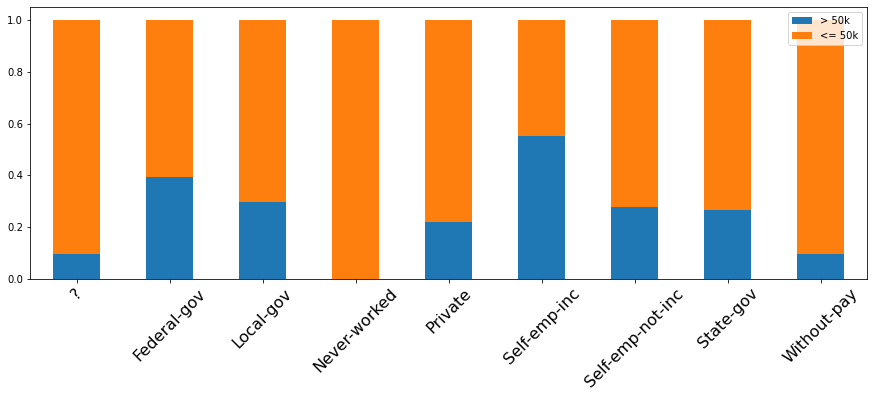

In [13]:
# Plotting the graph
plt.figure(figsize=(15,5))
ax = plt.subplot(1, 1, 1)
aux.plot(ax=ax, kind='bar', stacked=True)

de_para = [
    '?',
    'Federal-gov',
    'Local-gov',
    'Never-worked',
    'Private',
    'Self-emp-inc',
    'Self-emp-not-inc',
    'State-gov',
    'Without-pay',
]

plt.xticks([0,1,2,3,4,5,6,7,8],de_para,fontsize=16,rotation=45);

## There is a bigger concentration of people that earn more than 50k reais for those that have their own company or that work for the government

In [14]:
df

age  workclass    fnlwgt  education  education-num  marital-status  \
0      39.0          7   77516.0          9           13.0               4   
1      50.0          6   83311.0          9           13.0               2   
2      38.0          4  215646.0         11            9.0               0   
3      53.0          4  234721.0          1            7.0               2   
4      28.0          4  338409.0          9           13.0               2   
...     ...        ...       ...        ...            ...             ...   
48837  39.0          4  215419.0          9           13.0               0   
48838  64.0          0  321403.0         11            9.0               6   
48839  38.0          4  374983.0          9           13.0               2   
48840  44.0          4   83891.0          9           13.0               0   
48841  35.0          5  182148.0          9           13.0               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               1             1     4    1        2174.0           0.0   
1               4             0     4    1           0.0           0.0   
2               6             1     4    1           0.0           0.0   
3               6             0     2    1           0.0           0.0   
4              10             5     2    0           0.0           0.0   
...           ...           ...   ...  ...           ...           ...   
48837          10             1     4    0           0.0           0.0   
48838           0             2     2    1           0.0           0.0   
48839          10             0     4    1           0.0           0.0   
48840           1             3     1    1        5455.0           0.0   
48841           4             0     4    1           0.0           0.0   

       hours-per-week  native-country  target  
0                40.0              39       1  
1                13.0              39       1  
2                40.0              39       1  
3                40.0              39       1  
4                40.0               5       1  
...               ...             ...     ...  
48837            36.0              39       1  
48838            40.0              39       1  
48839            50.0              39       1  
48840            40.0              39       1  
48841            60.0              39       0  

[48842 rows x 15 columns]

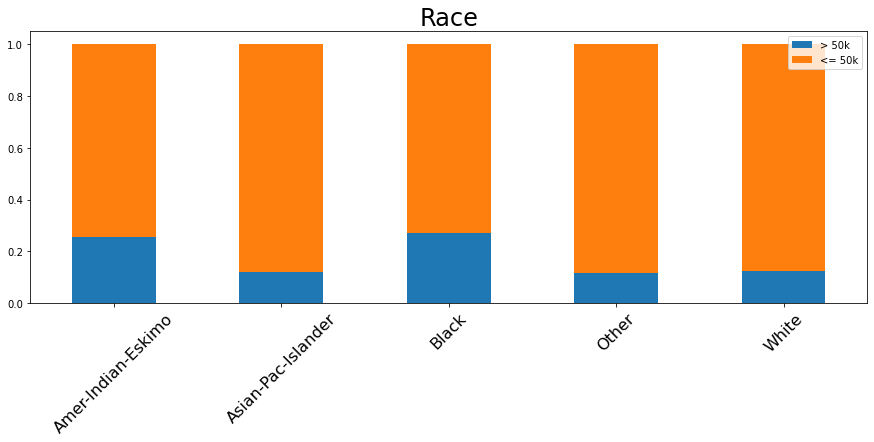

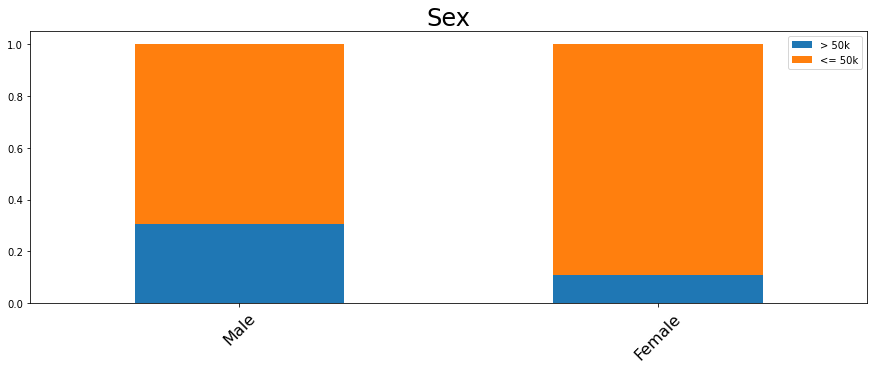

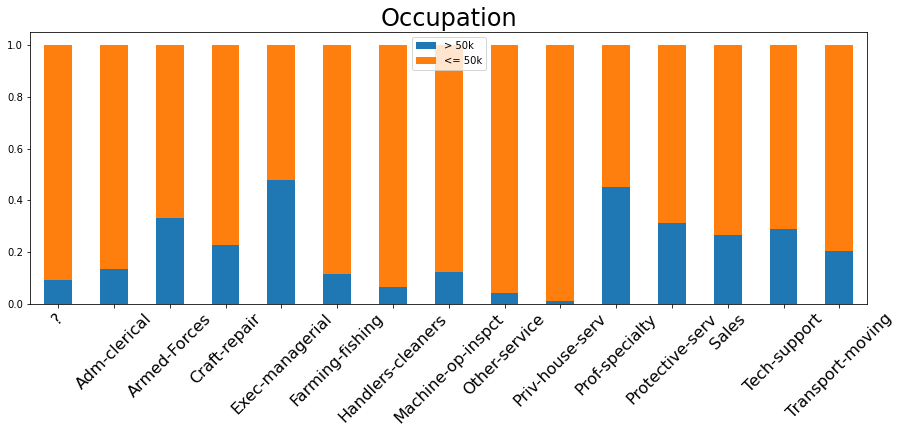

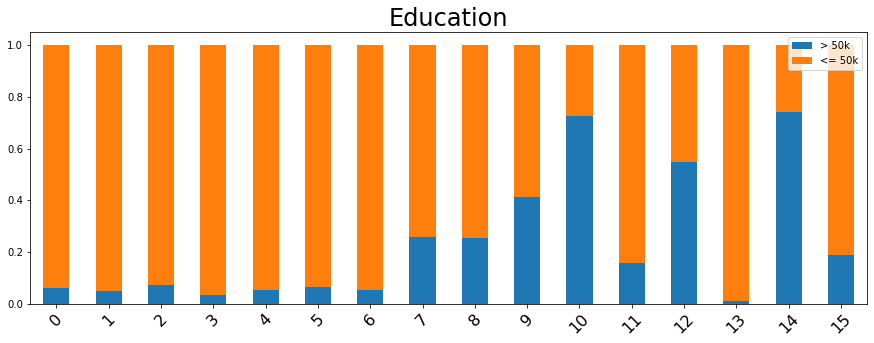

In [15]:
# Doing the same graph for different variables

# Race
rcnt_0 = df.loc[df.target==0].race.value_counts(dropna=False)
rcnt_1 = df.loc[df.target==1].race.value_counts(dropna=False)
raux = pd.concat([rcnt_0.rename('> 50k'),rcnt_1.rename('<= 50k')],axis=1).fillna(0)
raux = raux.div(raux.sum(axis='columns'),axis='rows')
plt.figure(figsize=(15,5))
rax = plt.subplot(1, 1, 1)
raux.plot(ax=rax, kind='bar', stacked=True)
rde_para = [
    'Amer-Indian-Eskimo',
    'Asian-Pac-Islander',
    'Black',
    'Other',
    'White'
]
plt.xticks([0,1,2,3,4],rde_para,fontsize=16,rotation=45)
plt.title('Race', fontsize=24);

# Sex
scnt_0 = df.loc[df.target==0].sex.value_counts(dropna=False)
scnt_1 = df.loc[df.target==1].sex.value_counts(dropna=False)
saux = pd.concat([scnt_0.rename('> 50k'),scnt_1.rename('<= 50k')],axis=1).fillna(0)
saux = saux.div(saux.sum(axis='columns'),axis='rows')
plt.figure(figsize=(15,5))
sax = plt.subplot(1, 1, 1)
saux.plot(ax=sax, kind='bar', stacked=True)
sde_para = [
    'Male',
    'Female'
]
plt.xticks([0, 1],sde_para,fontsize=16,rotation=45)
plt.title('Sex', fontsize=24);

# Occupation
ocnt_0 = df.loc[df.target==0].occupation.value_counts(dropna=False)
ocnt_1 = df.loc[df.target==1].occupation.value_counts(dropna=False)
oaux = pd.concat([ocnt_0.rename('> 50k'),ocnt_1.rename('<= 50k')],axis=1).fillna(0)
oaux = oaux.div(oaux.sum(axis='columns'),axis='rows')
plt.figure(figsize=(15,5))
oax = plt.subplot(1, 1, 1)
oaux.plot(ax=oax, kind='bar', stacked=True)
ode_para = [
    '?',
    'Adm-clerical',
    'Armed-Forces',
    'Craft-repair',
    'Exec-managerial',
    'Farming-fishing',
    'Handlers-cleaners',
    'Machine-op-inspct',
    'Other-service',
    'Priv-house-serv',
    'Prof-specialty',
    'Protective-serv',
    'Sales',
    'Tech-support',
    'Transport-moving',
]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],ode_para,fontsize=16,rotation=45)
plt.title('Occupation', fontsize=24);

# Education
ecnt_0 = df.loc[df.target==0].education.value_counts(dropna=False)
ecnt_1 = df.loc[df.target==1].education.value_counts(dropna=False)
eaux = pd.concat([ecnt_0.rename('> 50k'),ecnt_1.rename('<= 50k')],axis=1).fillna(0)
eaux = eaux.div(eaux.sum(axis='columns'),axis='rows')
plt.figure(figsize=(15,5))
eax = plt.subplot(1, 1, 1)
eaux.plot(ax=eax, kind='bar', stacked=True)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], fontsize=16,rotation=45)
plt.title('Education', fontsize=24);

## Observations:
### - 'Sex': Men have, proportionally, a higher income than women (gender wage gap).
### - 'Race': Oddly, racial minorities presented a higher income than the majorities populations (result of inclusive policies, smaller sample size or data set error?).
### - 'Occupation': As expected, blue-collar workers presented a lower income than the rest of our population.
### - 'Education': Mostly, the education level had a big impact on the person's income. However, we have surprising values, like those in the education 'levels' 11, 13 e 15. Most likely there was a small sample size of people with these education degrees, so were these divergencies a coincidence? Or an error of data collection?

# Variable correlation

- In our model, **there are a lot of variables that are correlated** (for example: 'Husband' and 'Male'), given that we should pay attention to these correlations.
- Still, the model must be **interpretable**, therefore, it is of utmost importance to be aware of this factor.

### The Cramer-V method was used for the calculation of variable correlation
- Since we are working with categorical variables, using Pearson or Spearman is not possible.
- As I didn't know this method, I've used following article to solve this problem: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

In [16]:
# Getting the variables that should be ordinated
df_cat = df[[
    'workclass',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'target'
]]

# This part of the code was extracted from the web
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

corr_cat = df_cat.corr(cramers_v)
corr_cat

workclass  marital-status  occupation  relationship      race  \
workclass        1.000000        0.084506    0.399724      0.099983  0.056883   
marital-status   0.084506        1.000000    0.130568      0.488059  0.082269   
occupation       0.399724        0.130568    1.000000      0.177452  0.077071   
relationship     0.099983        0.488059    0.177452      1.000000  0.096989   
race             0.056883        0.082269    0.077071      0.096989  1.000000   
sex              0.151246        0.459324    0.423881      0.646470  0.113610   
native-country   0.031524        0.059368    0.062412      0.073841  0.400618   
target           0.181151        0.448170    0.349594      0.454379  0.099447   

                     sex  native-country    target  
workclass       0.151246        0.031524  0.181151  
marital-status  0.459324        0.059368  0.448170  
occupation      0.423881        0.062412  0.349594  
relationship    0.646470        0.073841  0.454379  
race            0.113610        0.400618  0.099447  
sex             1.000000        0.053762  0.214532  
native-country  0.053762        1.000000  0.091759  
target          0.214532        0.091759  1.000000

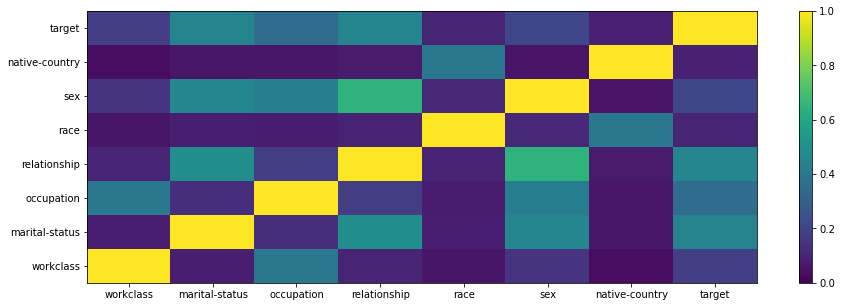

In [17]:
plt.figure(figsize=(15,5))
plt.pcolormesh(corr_cat.index, corr_cat.columns, corr_cat, vmin=0, vmax=1, shading='nearest')
plt.colorbar()

### We can see that 'relationship' and 'sex' have strong correlation, as previously said. Other variables that presented correlation on a smaller scale were:
- 'sex' with 'occupation'.
- 'relationship' and 'marital-status', as expected.
- 'relationship', 'occupation' and 'marital-status' with the response variable 'target'.

In [18]:
# Now for the numerical variables
df_num = df[[
    'age',
    'fnlwgt',
    'education',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'target'
]]
corr_num = df_num.corr(method='pearson')
corr_num

age    fnlwgt  education  education-num  capital-gain  \
age             1.000000 -0.076628  -0.015058       0.030940      0.077229   
fnlwgt         -0.076628  1.000000  -0.022570      -0.038761     -0.003706   
education      -0.015058 -0.022570   1.000000       0.359668      0.028928   
education-num   0.030940 -0.038761   0.359668       1.000000      0.125146   
capital-gain    0.077229 -0.003706   0.028928       0.125146      1.000000   
capital-loss    0.056944 -0.004366   0.017638       0.080972     -0.031441   
hours-per-week  0.071558 -0.013519   0.057659       0.143689      0.082157   
target         -0.230369  0.006339  -0.080091      -0.332613     -0.223013   

                capital-loss  hours-per-week    target  
age                 0.056944        0.071558 -0.230369  
fnlwgt             -0.004366       -0.013519  0.006339  
education           0.017638        0.057659 -0.080091  
education-num       0.080972        0.143689 -0.332613  
capital-gain       -0.031441        0.082157 -0.223013  
capital-loss        1.000000        0.054467 -0.147554  
hours-per-week      0.054467        1.000000 -0.227687  
target             -0.147554       -0.227687  1.000000

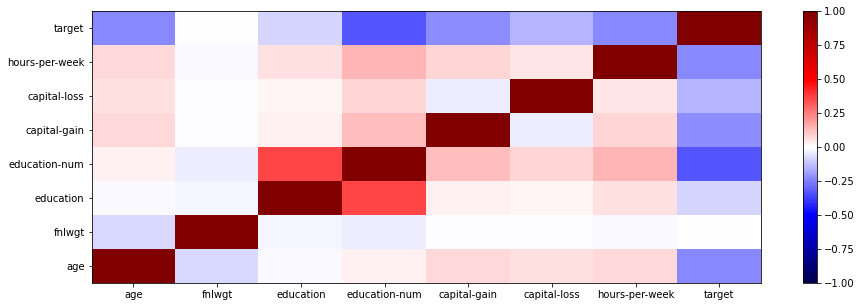

In [19]:
plt.figure(figsize=(15,5))
plt.pcolormesh(corr_num.index, corr_num.columns, corr_num, vmin=-1, vmax=1, shading='nearest', cmap='seismic')
plt.colorbar()

### Variables that presented correlation:
- Response variable 'target' with 'age' and 'education-num', which makes sense.
- 'education' and 'education-num', as expected.

# Modeling

In [20]:
df

age  workclass    fnlwgt  education  education-num  marital-status  \
0      39.0          7   77516.0          9           13.0               4   
1      50.0          6   83311.0          9           13.0               2   
2      38.0          4  215646.0         11            9.0               0   
3      53.0          4  234721.0          1            7.0               2   
4      28.0          4  338409.0          9           13.0               2   
...     ...        ...       ...        ...            ...             ...   
48837  39.0          4  215419.0          9           13.0               0   
48838  64.0          0  321403.0         11            9.0               6   
48839  38.0          4  374983.0          9           13.0               2   
48840  44.0          4   83891.0          9           13.0               0   
48841  35.0          5  182148.0          9           13.0               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0               1             1     4    1        2174.0           0.0   
1               4             0     4    1           0.0           0.0   
2               6             1     4    1           0.0           0.0   
3               6             0     2    1           0.0           0.0   
4              10             5     2    0           0.0           0.0   
...           ...           ...   ...  ...           ...           ...   
48837          10             1     4    0           0.0           0.0   
48838           0             2     2    1           0.0           0.0   
48839          10             0     4    1           0.0           0.0   
48840           1             3     1    1        5455.0           0.0   
48841           4             0     4    1           0.0           0.0   

       hours-per-week  native-country  target  
0                40.0              39       1  
1                13.0              39       1  
2                40.0              39       1  
3                40.0              39       1  
4                40.0               5       1  
...               ...             ...     ...  
48837            36.0              39       1  
48838            40.0              39       1  
48839            50.0              39       1  
48840            40.0              39       1  
48841            60.0              39       0  

[48842 rows x 15 columns]

In [21]:
X = df.drop(columns='target', axis=1)
y = df.target

from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=2021)

In [22]:
X_tr.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [23]:
X_ts.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

### Data set doesn't have missing values!

## Cross Validation

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512, 1028],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=2021),
                   params,
                   cv=5,
                   scoring='roc_auc',
                   verbose=5)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1028]},
             scoring='roc_auc', verbose=5)

In [25]:
grid.fit(X_tr, y_tr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ...............criterion=gini, max_leaf_nodes=4; total time=   0.1s
[CV 2/5] END ...............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 3/5] END ...............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 4/5] END ...............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 5/5] END ...............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 1/5] END ...............criterion=gini, max_leaf_nodes=8; total time=   0.0s
[CV 2/5] END ...............criterion=gini, max_leaf_nodes=8; total time=   0.0s
[CV 3/5] END ...............criterion=gini, max_leaf_nodes=8; total time=   0.0s
[CV 4/5] END ...............criterion=gini, max_leaf_nodes=8; total time=   0.0s
[CV 5/5] END ...............criterion=gini, max_leaf_nodes=8; total time=   0.0s
[CV 1/5] END ..............criterion=gini, max_leaf_nodes=16; total time=   0.1s
[CV 2/5] END ..............criterion=gini, max_l

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1028]},
             scoring='roc_auc', verbose=5)

### After the cross validation, we have the following parameters as optimal:

In [26]:
grid.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 64}

# Validation

In [27]:
y_pred = grid.predict_proba(X_ts)[:, 1]
y_pred

array([0.94266917, 0.90301724, 0.99514268, ..., 0.92060811, 0.69811321,
       0.55195911])

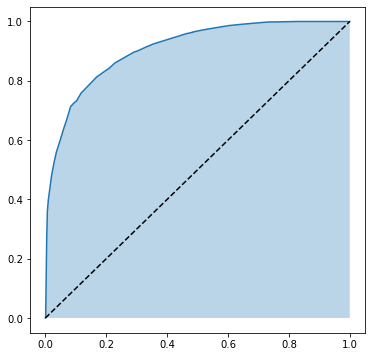

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve(y_ts, y_pred)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.fill_between(fpr, tpr,alpha=.3)
plt.plot((0, 1), (0, 1), 'k--')

In [29]:
roc_auc_score(y_ts, y_pred)

0.9077076863057042

### Great score! The model is performing well.

# Feature importance
 Since we want a **explanatory** model and we want to **understand our demographic data**, identifying the importance of our features for the income of our population can be extremely beneficial.

In [30]:
grid.best_estimator_.feature_importances_

array([0.0548852 , 0.00272908, 0.        , 0.        , 0.19336448,
       0.        , 0.01344149, 0.42552167, 0.        , 0.        ,
       0.20294448, 0.06741535, 0.03969826, 0.        ])

In [31]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [32]:
importancias = grid.best_estimator_.feature_importances_
ordem = np.argsort(importancias)[::-1]
colunas = X.columns

for col,imp in zip(colunas[ordem],importancias[ordem]):
    print(f'{col:30s}{imp:.3f}')

relationship                  0.426
capital-gain                  0.203
education-num                 0.193
capital-loss                  0.067
age                           0.055
hours-per-week                0.040
occupation                    0.013
workclass                     0.003
native-country                0.000
sex                           0.000
race                          0.000
marital-status                0.000
education                     0.000
fnlwgt                        0.000


## Given that, the three most important features to determine whether or not a person has a higher income than 50.000 reais, for our model, are:
### 1- 'relationship': the type of relationship (if the person is a husband, wife, if the person has kids or not etc).
### 2- 'capital-gain': the gain of capital (continuous value).
### 3-'education-num': person's level of education (the metric used to determine these groups is unknown).